In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Closing Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
veri = pd.read_csv("File path", on_bad_lines = "skip")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
#Editing Column Names
veri.rename(columns={'ID' : 'id',
                     'Name' : 'isim',
                     'Gender' : 'cinsiyet',
                     'Age' : 'yas',
                     'Height' : 'boy',
                     'Weight' : 'kilo',
                     'Team' : 'takim',
                     'NOC' : 'uok',
                     'Games': 'oyunlar',
                     'Year' : 'yil',
                     'Season' : 'sezon',
                     'City' : 'sehir',
                     'Sport' : 'spor',
                     'Event' : 'etkinlik',
                     'Medal' : 'madalya'}, inplace = True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
#Removing Unnecessary data
veri = veri.drop(['id', 'oyunlar'], axis = 1)
veri.head(1)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


###Editing NaN values

In [ ]:
# boy ve kilo sütunu etkinlik ortalamasına göre doldurulacak
essiz_etkinlik = pd.unique(veri.etkinlik)
print('Eşsiz Etkinlik Sayısı: {}'.format(len(essiz_etkinlik)))

Eşsiz Etkinlik Sayısı: 765


In [ ]:
# her bir etkinliği iteratif olarak dolaş
# etkinlik özelinde boy ve kilo ortalamalarını hesapla
# etkinlik özelinde kayıp boy ve kilo değelerini etkinlik ortalamalarına eşitle
# Gerçek veriyi bozmamak için bir kopya oluştur
veri_gecici = veri.copy()
boy_kilo_liste = ["boy", "kilo"]

for e in essiz_etkinlik:
  etkinlik_filtre = veri_gecici.etkinlik == e
  #veriyi etkinliğe göre filtrele
  veri_filtreli = veri_gecici[etkinlik_filtre]

  # boy ve kilo için etkinlik özelinde ortalama hesapla
  for s in boy_kilo_liste:
    ortalama = np.round(np.mean(veri_filtreli[s]), 2)
    if ~np.isnan(ortalama): # eğer etkinlik özelinde ortalama varsa
      veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
    else: #eğer etkinlik özelinde ortalama varsa ortalamayı hesapla
      tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
      veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)

  #etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_geciciye eşitle
  veri_gecici[etkinlik_filtre] = veri_filtreli
#kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info() #boy ve kilo sütunlarında kayıp değer sayısına bakalım


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
# Yaş sütununu veri setinin yaş ortalamasına göre doldur
# yaş değişkeninde tanımlı olmayan değerleri bul
yas_ortalamasi = np.round(np.mean(veri.yas),2)
veri['yas'] = veri['yas'].fillna(yas_ortalamasi)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
# Madalya alamayan sporcuları veri setinden çıkaralım
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [ ]:
#madalyası olanları ayıralım
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
print(madalya_degiskeni_filtresi)

0         False
1         False
2         False
3          True
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: madalya, Length: 271116, dtype: bool


In [ ]:
veri = veri[madalya_degiskeni_filtresi]
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [ ]:
veri.to_csv("file path...", index = False)

# Tek Değişkenli Veri Analizi

## Numerik Değişkenleri İnceleme

In [ ]:
# histogram grafiklerini çizdiren fonkisyon
def plotHistogram(degisken):
  """
    Girdi: Değişken/sütun ismi
    Çıktı: İlgili değişkenin histogramı
  """
  plt.figure()
  plt.hist(veri[degisken], bins = 85, color = "orange")
  plt.xlabel(degisken)
  plt.ylabel("Frekans")
  plt.title('Veri Sıklığı - {}'.format(degisken))
  plt.show()

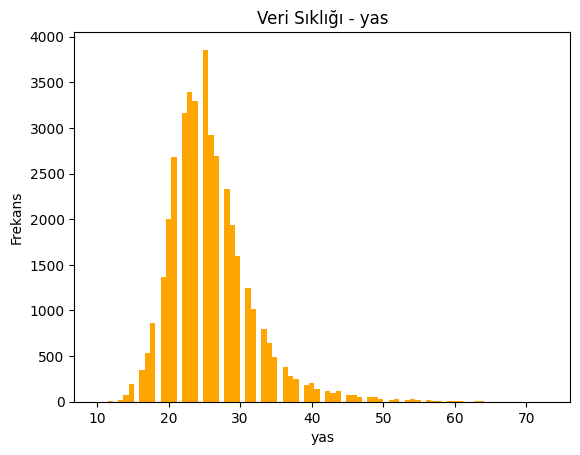

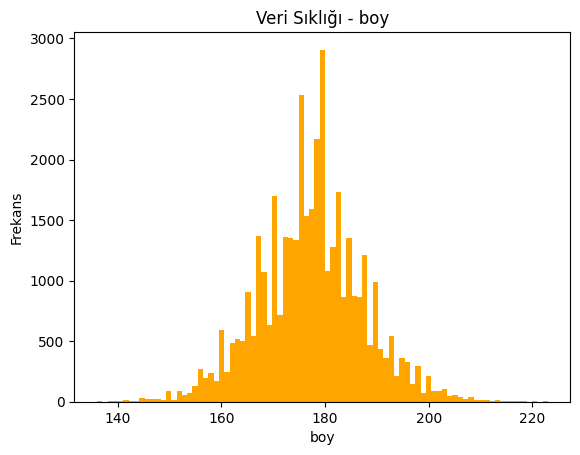

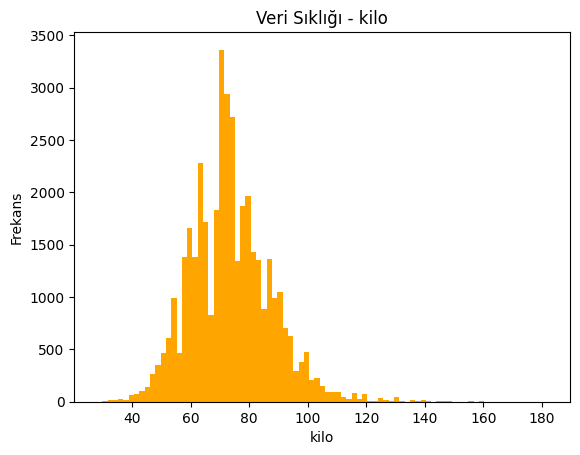

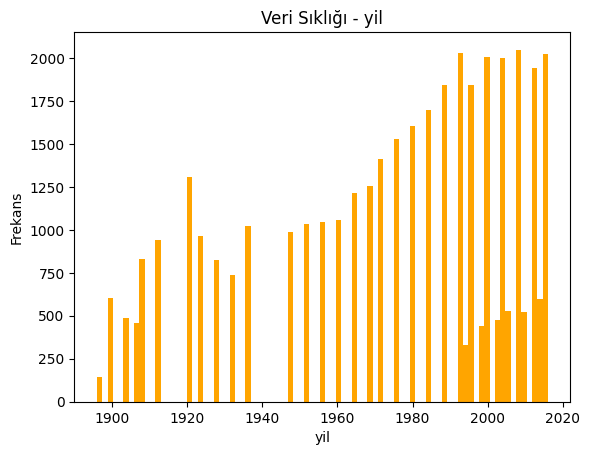

In [ ]:
# tüm sayısal değişkenler için histogramları çizdirelim
sayisal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayisal_degisken:
  plotHistogram(i)

## Box Plot

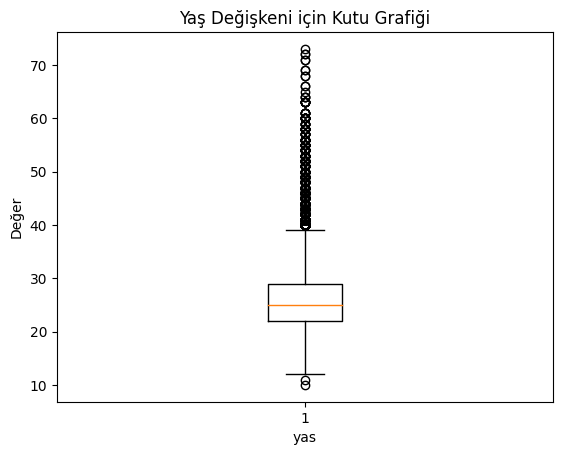

In [ ]:
plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni için Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel('Değer')
plt.show()

## Kategorik Verileri İnceleme

In [ ]:
# Çubuk grafiğini çizdireceğimiz fonksiyon
def plotBar(degisken, n = 5):
  """
  Girdi: Değişken/sütun ismi
  n: Gösterilecek en sık rastlanan eşsiz değer sayısı
  Çıktı: Çubuk/bar grafiği
  """
  veri_ = veri[degisken]
  veri_sayma = veri_.value_counts()
  #value_counts fonk bir veride o değerden toplam kaç tane var onu bulur ve büyükten küçüğe sıralar
  veri_sayma = veri_sayma[:n] # ilk n tanesini al
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "green")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 45)
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı - {}".format(degisken))
  plt.show()
  print("{}: \n {}".format(degisken, veri_sayma))

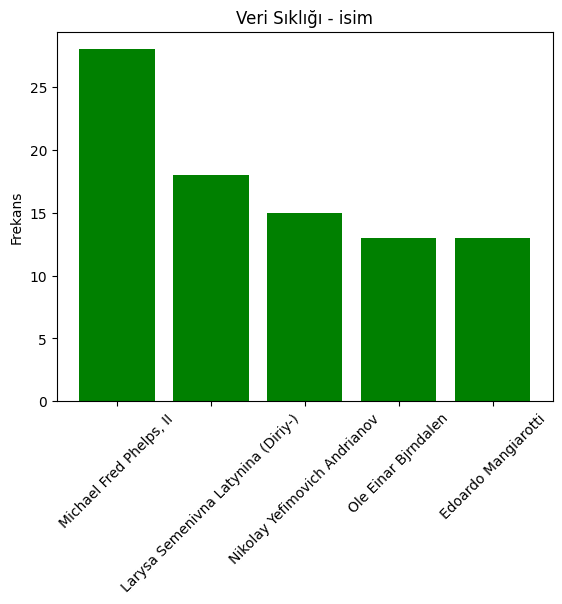

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


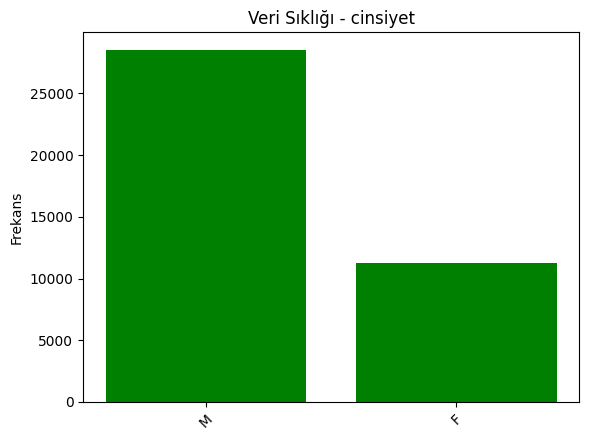

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


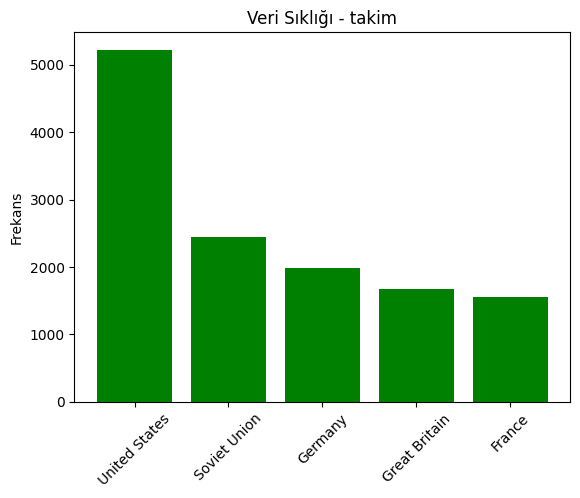

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


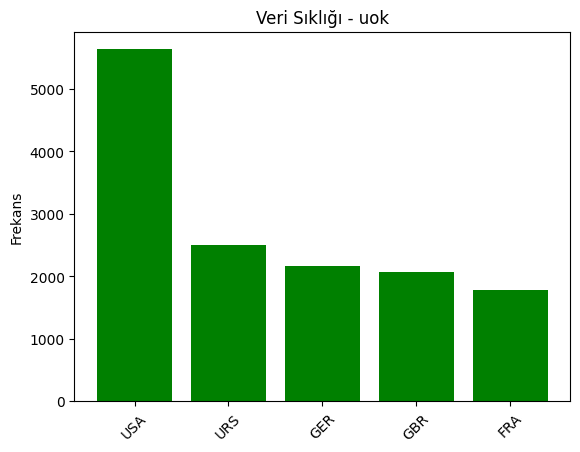

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


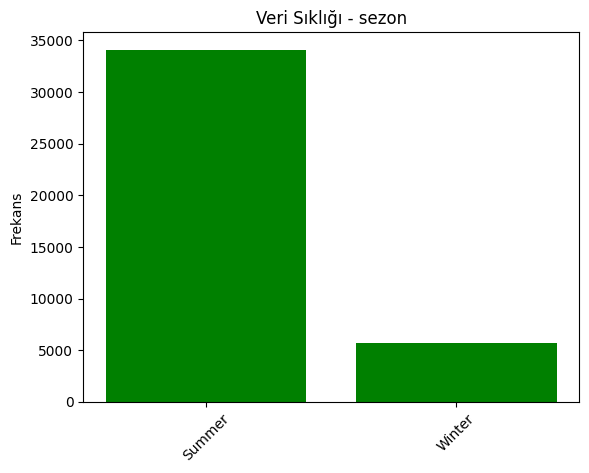

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


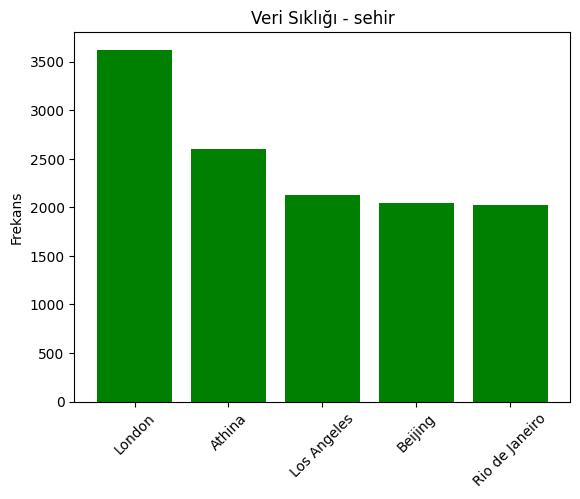

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


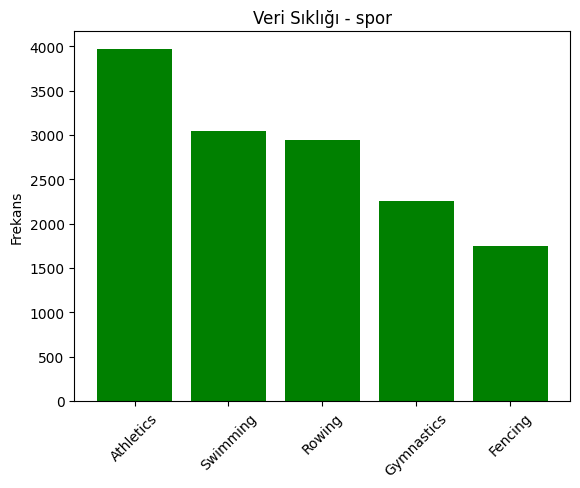

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


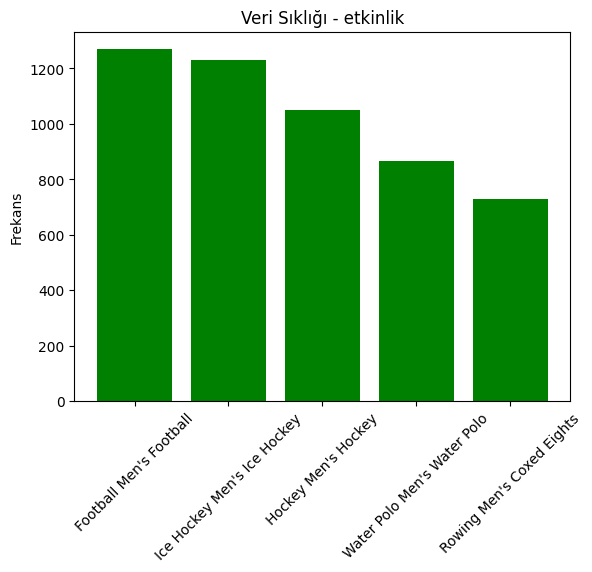

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


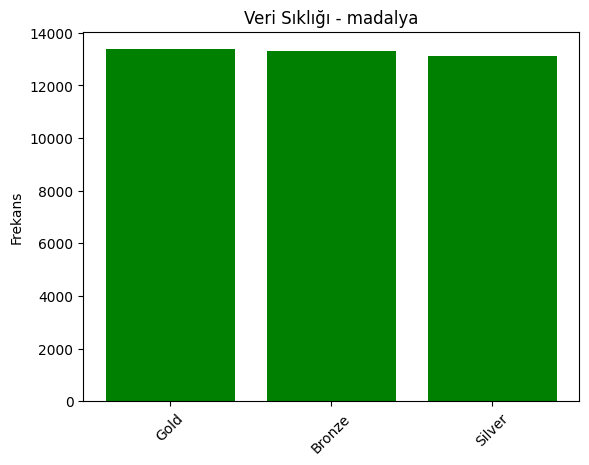

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [ ]:
kategorik_degisken = ['isim', 'cinsiyet', 'takim', 'uok', 'sezon', 'sehir', 'spor', 'etkinlik', 'madalya']
for i in kategorik_degisken:
  plotBar(i)

# İki Değişkenli Veri Analizi

### Cinsiyete göre Boy ve Ağırlık Karşılaştırması

In [ ]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [ ]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


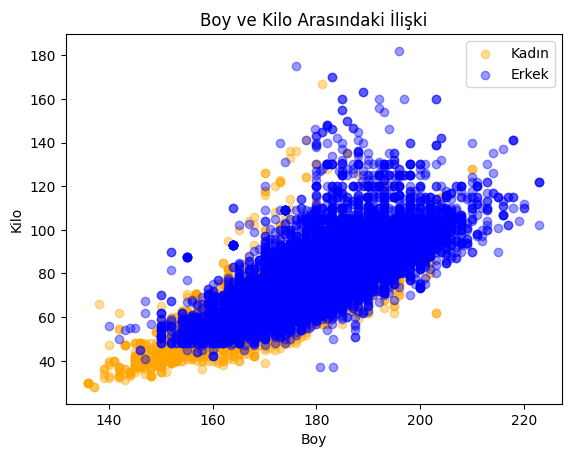

In [ ]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.4, label = "Kadın", color = "orange")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = "Erkek", color = "blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

### Sayısal Sütunlar Arasında İlişki İncelemesi

In [ ]:
veri.loc[:, ["yas", "boy", "kilo"]].corr() #korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


### Madalya ve Yaş Arasındaki İlişki

In [ ]:
#sporcularımızı altın, gümüş ve bronz madalyaya göre ayıralım
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=["madalya"])
veri_gecici.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [ ]:
veri_gecici.loc[:,["yas", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


### Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları

In [ ]:
veri_gecici[["takim", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["takim"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


### Kazanılan Madalyaların Hangi Şehirde Kazanıldığı

In [ ]:
veri_gecici[["sehir", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["sehir"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


### Cinsiyete Göre Kazanılan Madalya Sayıları

In [ ]:
veri_gecici[["cinsiyet", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["cinsiyet"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


# Çok Değişkenli Veri Analizi

## Pivot Tablosu

In [ ]:
veri_pivot = veri.pivot_table(index="madalya", columns="cinsiyet",
                              values=["boy", "kilo", "yas"],
                              aggfunc = {"boy":np.mean, "kilo":np.mean, "yas":[min, max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

## Anomali Tespiti

In [ ]:
def anomaliTespiti(df, ozellik):
  outlier_indices = []

  for c in ozellik:
    # 1. çeyrek
    Q1 = np.percentile(df[c],25)
    # 3. çeyrek
    Q3 = np.percentile(df[c],75)
    # IQR
    IQR = Q3 - Q1
    # aykırı değer için ek adım miktarı
    outlier_step = 1.5 * IQR
    # aykırı değeri ve de bulunduğu indexi tespit edelim
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
    # tespit edilen indexleri depola
    outlier_indices.extend(outlier_list_col)
  
  # eşsiz aykırı değerleri bulalım
  outlier_indices = Counter(outlier_indices)
  # eğer bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim
  multipler_outliers = list(i for i, v in outlier_indices.items() if v > 1)

  return multipler_outliers

In [ ]:
veri_anomali = veri.loc[anomaliTespiti(veri, ["yas", "kilo", "boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

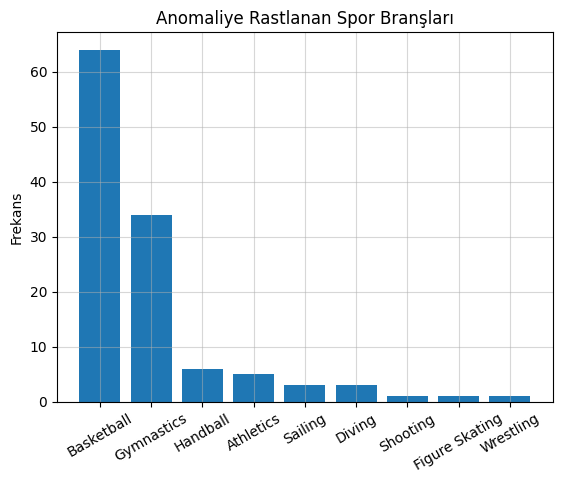

In [ ]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha = 0.5)
plt.show()

In [ ]:
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [ ]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

In [ ]:
veri_basketbol = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [ ]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

## Zaman Serilerinde Veri Analizi

*   Yıllara göre ortalama yaş, boy ve kilo değişimi
*   Yıllara göre madalya sayıları



In [ ]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [ ]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [ ]:
# olimpiyatların yapıldığı yılları sıralayalım
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

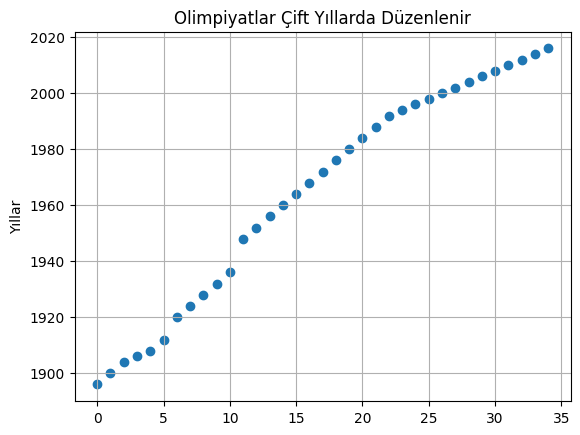

In [ ]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [ ]:
# veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yil"], format = "%Y")
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [ ]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [ ]:
# veri_zaman değişkeninin ana indeksini, datetime tipi olan tarih_saat değerine güncelleyelim
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"], axis = 1, inplace= True)
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


## Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi

In [ ]:
periyodik_veri = veri_zaman.resample("2A").mean() # 2 yıllık periyotlar halinde ortalama değerleri alıyor
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [ ]:
# kayıp verileri çıkar
periyodik_veri.dropna(axis = 0, inplace = True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

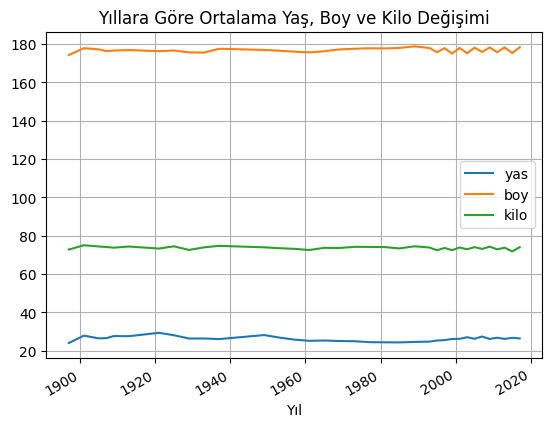

In [ ]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

## Yıllara Göre Madalya Sayıları

In [ ]:
veri_zaman = pd.get_dummies(veri_zaman, columns = ["madalya"])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [ ]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()
# kayıp verileri çıkar
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710,671,667
2010-12-31,13896.0,91395.00,37877.12,171,174,175
2012-12-31,50595.0,346091.47,143102.94,679,632,630
2014-12-31,15907.0,104686.00,42838.63,198,202,197
2016-12-31,53256.0,360846.03,149628.71,703,665,655


<Figure size 640x480 with 0 Axes>

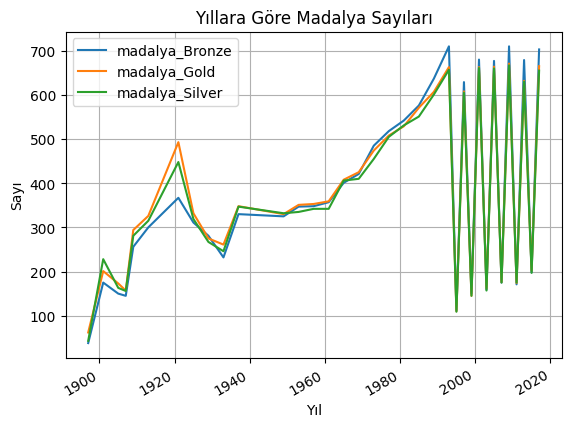

In [ ]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

## Yıllara ve Sezonlara Göre Madalya Sayıları

In [ ]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [ ]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head(3)

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32


In [ ]:
periyodik_veri_yaz = yaz.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head(3)

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38,62,43
1900-12-31,16783.16,107440.91,45287.89,175,201,228
1904-12-31,12812.84,86139.17,36124.78,150,173,163


<Figure size 640x480 with 0 Axes>

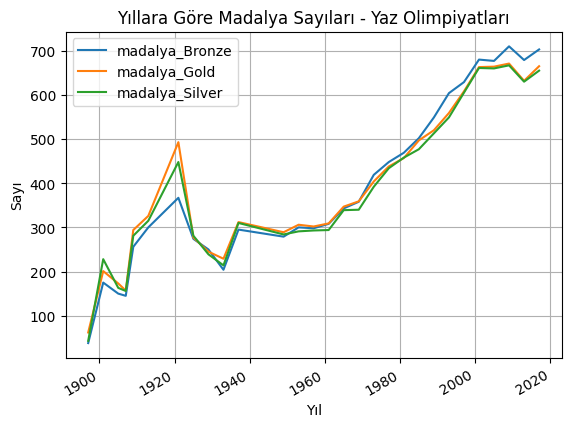

In [ ]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Olimpiyatları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

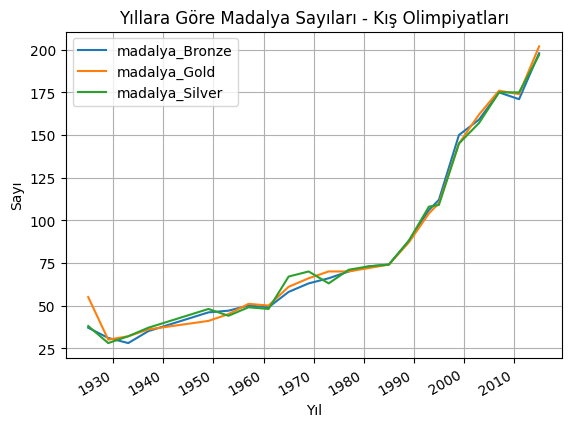

In [ ]:
plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Kış Olimpiyatları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()